In [11]:
%load_ext autoreload
%autoreload 1

import sys
import numpy as np
HOME='/mnt/home/llorente/'
#HOME='/home/cj/'
sys.path.append(HOME+'comp_structure_research')
sys.path.append(HOME+'comp_structure_research/stellar_mass_fraction')


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import yt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

# Analysis for the Big Box 25 Mpc simulation at z = 2


In [97]:
%aimport HaloData
from HaloData import HaloData

dataset_fname  = "~/cosmo_bigbox/25Mpc_512/RD0111/RD0111"
halo_dat_fname = "halodata_RD0111.dat"
hd = HaloData.load_from_file(halo_dat_fname)


In [4]:
def DarkMatter(pfilter, data):
    filter = data[("all", "particle_type")] == 1 # DM = 1, Stars = 2
    return filter
    
yt.add_particle_filter("dark_matter", function=DarkMatter, filtered_type='all', \
                    requires=["particle_type"])

def stars(pfilter, data):
    filter = data[("all", "particle_type")] == 2 # DM = 1, Stars = 2
    return filter

yt.add_particle_filter("stars", function=stars, filtered_type='all', \
                       requires=["particle_type"])

ds = yt.load(dataset_fname)
ds.add_particle_filter('stars')
ds.add_particle_filter('dark_matter')
ad = ds.all_data()
(ad.right_edge-ad.left_edge).to('Mpc')

yt : [INFO     ] 2020-06-12 12:19:47,260 Parameters: current_time              = 154.50086626384
yt : [INFO     ] 2020-06-12 12:19:47,261 Parameters: domain_dimensions         = [512 512 512]
yt : [INFO     ] 2020-06-12 12:19:47,263 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-06-12 12:19:47,264 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2020-06-12 12:19:47,265 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2020-06-12 12:19:47,266 Parameters: current_redshift          = 2.0039999729143
yt : [INFO     ] 2020-06-12 12:19:47,267 Parameters: omega_lambda              = 0.715
yt : [INFO     ] 2020-06-12 12:19:47,268 Parameters: omega_matter              = 0.285
yt : [INFO     ] 2020-06-12 12:19:47,268 Parameters: hubble_constant           = 0.695
Parsing Hierarchy : 100%|██████████| 142694/142694 [00:17<00:00, 8066.96it/s] 
yt : [INFO     ] 2020-06-12 12:20:11,763 Gathering a field list (this may take a moment.)


YTArray([11.97444186, 11.97444186, 11.97444186]) Mpc

# Stellar Mass Fraction for 25 Mpc Box at z = 2

In [67]:
print(ds.current_redshift)
print(ds.domain_width.to('Mpccm/h'))
print(ds.domain_width.to('Mpc'))

2.0039999729143
[25. 25. 25.] Mpccm/h
[11.97444186 11.97444186 11.97444186] Mpc


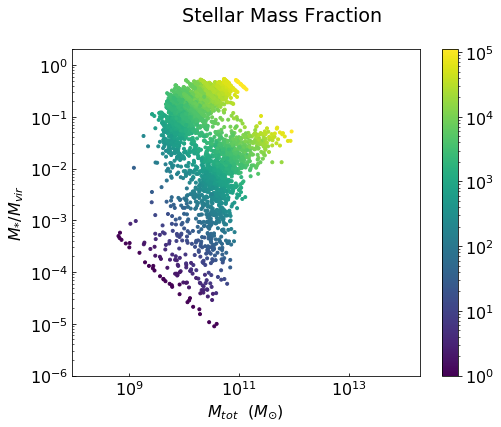

In [39]:

%aimport stellar_mass_fraction_plots
from stellar_mass_fraction_plots import *
#stellar_mass_fraction_scatter(halo_dat2_fname, cutoff=0)
stellar_mass_fraction_scatter(hd)
#interact(stellar_mass_fraction_scatter, hd=fixed(hd), cutoff=(0, 1e3));

Stellar Mass Fraction of each halo, plotted against their total mass. The color represents the total number of star particles in each halo. 

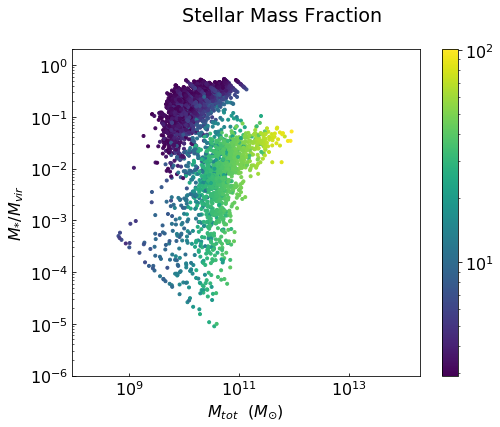

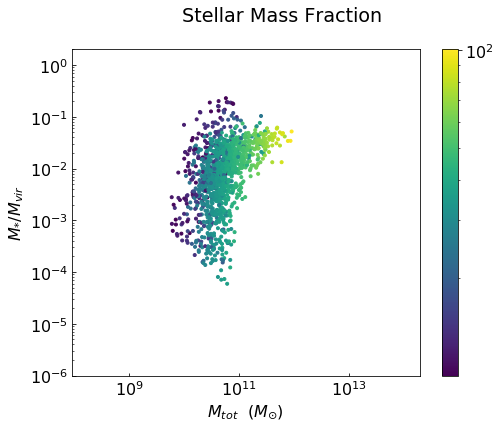

In [69]:
%aimport stellar_mass_fraction_plots
from stellar_mass_fraction_plots import *

greater_than = lambda x,y: x>y

stellar_mass_fraction_scatter(hd, color_field=Fields.RADIUS)
filtered = hd.filter_by(Fields.RADIUS, greater_than, 10).filter_by(Fields.NUM_STAR_PARTICLES, greater_than, 10)
stellar_mass_fraction_scatter(filtered, color_field=Fields.RADIUS)

Same thing but now the colors show the virial radius of each halo. 

Same as the above except that halos with mass less than a certain mass have been excluded. 

# Visual Inspection of Rockstar's Goddamn Motherfucking Bullshit

There's a large collection of very small halos around the location
```
 (5.5864398291, 4.8076908722, 6.7319645557) Mpc  
```
in the box with radii on the order of 1-10 kpc. So here's a box zoomed into that location with halos annotated to see what's really going on. 

In [94]:
domain = ds.domain_width.to('Mpc').value[0]
mid_box = 0.01*domain
small_box = 0.001*domain

max_rad = 0
for i in range(0, 100):
    halo = hd.halos[i]
    if max_rad < halo[Fields.RADIUS]:
        c = np.array((halo[Fields.XPOS], halo[Fields.YPOS], halo[Fields.ZPOS]))/domain
        max_rad = halo[Fields.RADIUS]

left = c - np.ones(3)*mid_box/2
right = c + np.ones(3)*mid_box/2
mid_region = ds.box(left, right)

left = c - np.ones(3)*small_box/2
right = c + np.ones(3)*small_box/2
small_region = ds.box(left, right)

yt : [INFO     ] 2020-06-12 16:45:26,276 Projection completed
yt : [INFO     ] 2020-06-12 16:45:26,277 xlim = 0.424462 0.434462
yt : [INFO     ] 2020-06-12 16:45:26,278 ylim = 0.705860 0.715860
yt : [INFO     ] 2020-06-12 16:45:26,282 xlim = 0.424462 0.434462
yt : [INFO     ] 2020-06-12 16:45:26,283 ylim = 0.705860 0.715860
yt : [INFO     ] 2020-06-12 16:45:26,284 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800
yt : [INFO     ] 2020-06-12 16:45:26,709 Projection completed
yt : [INFO     ] 2020-06-12 16:45:26,710 xlim = 0.428962 0.429962
yt : [INFO     ] 2020-06-12 16:45:26,711 ylim = 0.710360 0.711360
yt : [INFO     ] 2020-06-12 16:45:26,712 xlim = 0.428962 0.429962
yt : [INFO     ] 2020-06-12 16:45:26,713 ylim = 0.710360 0.711360
yt : [INFO     ] 2020-06-12 16:45:26,714 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



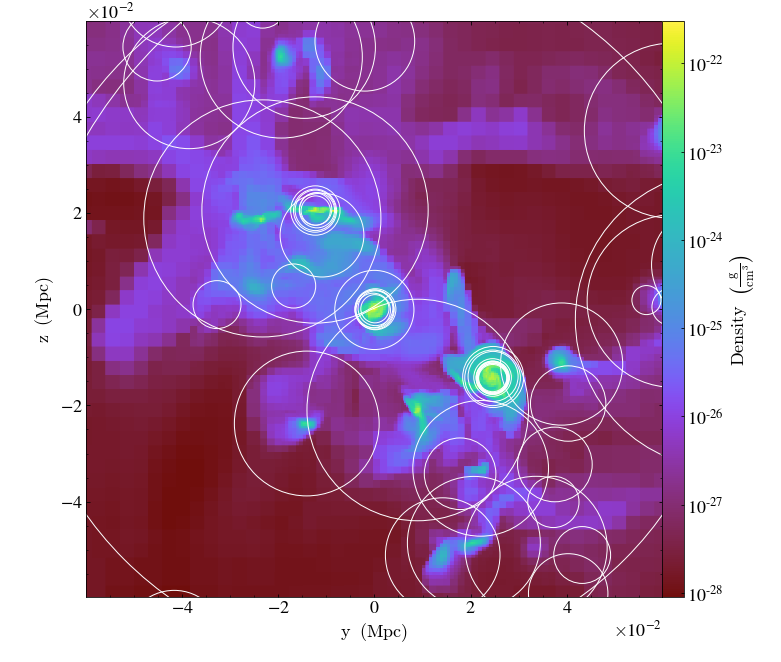


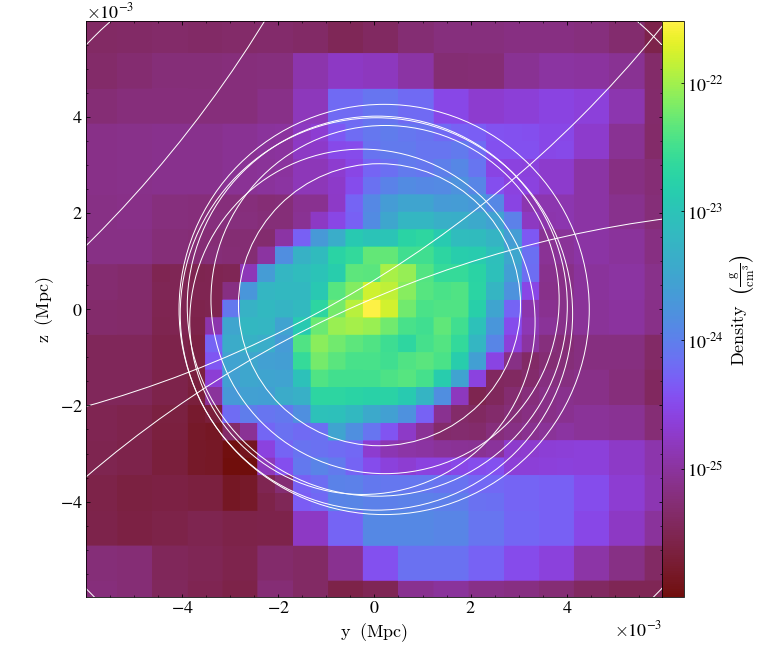

In [98]:
mid_p = yt.ProjectionPlot(ds,'x','density', weight_field='density', center=c, width=(mid_box,'Mpc'), data_source=mid_region)
small_p = yt.ProjectionPlot(ds,'x','density', weight_field='density', center=c, width=(small_box,'Mpc'), data_source=small_region)

for i in range(0, hd.num_halos):
    halo = hd.halos[i]
    hpos = np.array((halo[Fields.XPOS], halo[Fields.YPOS], halo[Fields.ZPOS]))/domain
    mid_p.annotate_sphere(hpos, radius=(halo[Fields.RADIUS],'kpc'))
    small_p.annotate_sphere(hpos, radius=(halo[Fields.RADIUS],'kpc'))
    
mid_p.show()
small_p.show()




# Formula used to calculate stellar mass fraction:
$$
f = \frac{M_*}{\displaystyle \frac{\Omega_b}{\Omega_m} M_h}
$$

where
$M_*$ is total stellar mass in a halo

$\Omega_b$ is the cosmological baryon fraction

$\Omega_c$ is the cosmological (cold) dark matter fraction

$\Omega_m = \Omega_b + \Omega_c$

$M_h$ is the halo mass. Note: make sure we calculate halo mass the same way Behroozi does in Behroozi et al (2013)


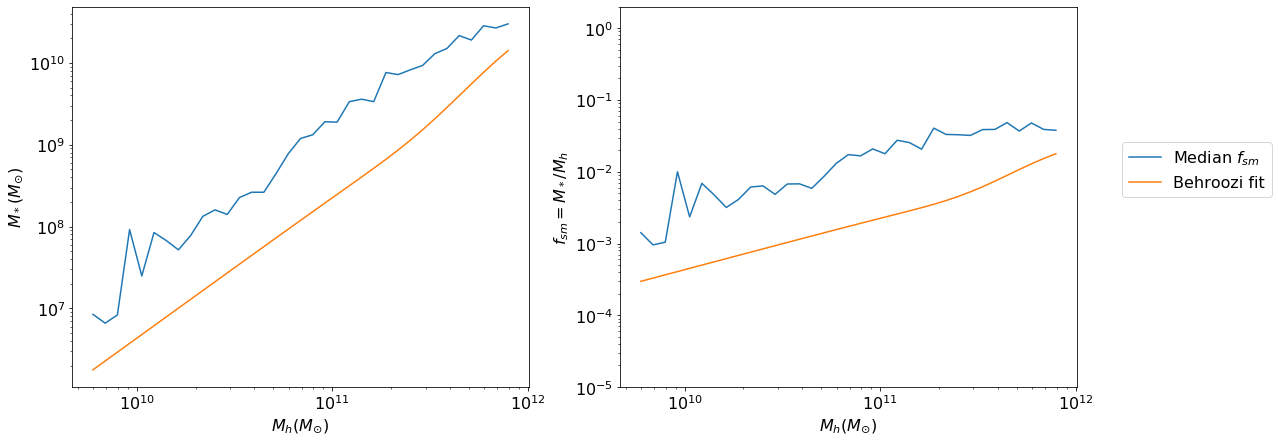

In [38]:
%aimport stellar_mass_fraction_plots
from stellar_mass_fraction_plots import *
stellar_mass_fraction_reduced(filtered, 2)

Median values for stellar mass and stellar mass fraction compared to Behroozi fit function at $z=0$. 


    
The scale factor in Behroozi's paper is the cosmological scale factor given by
    $$
    a = \frac{1}{1+z}
    $$

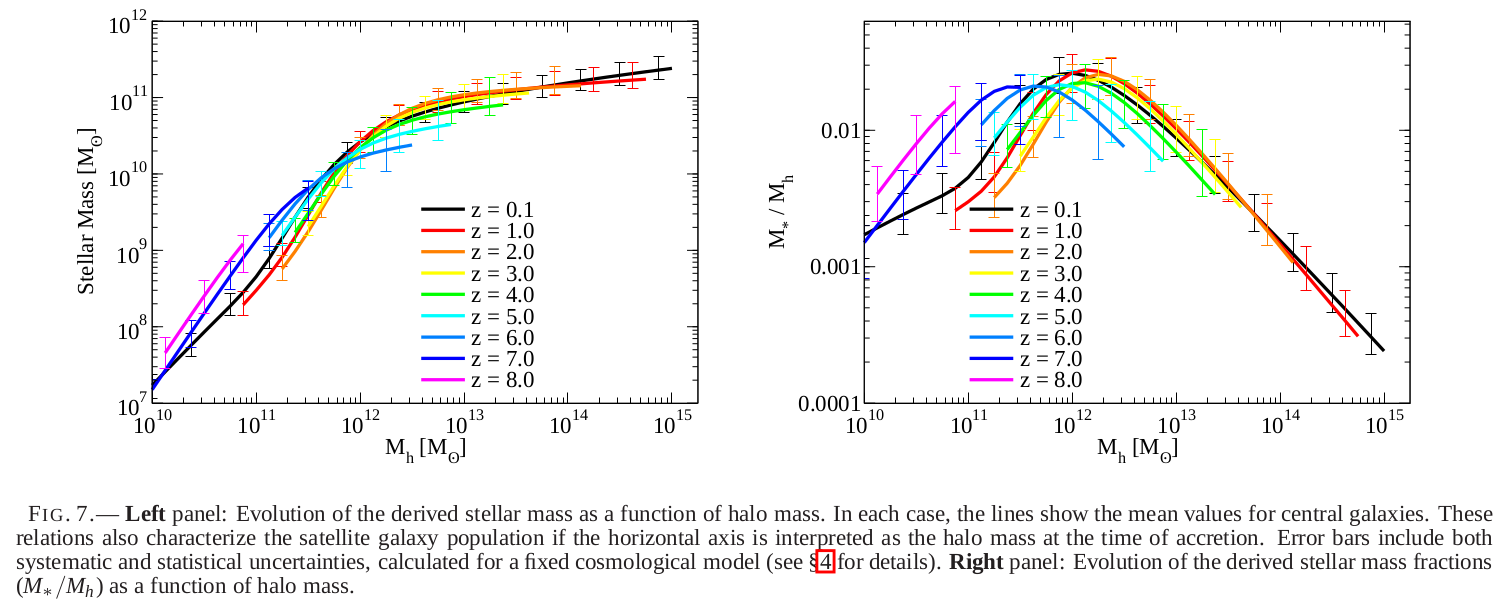

Behroozi describes his fit function as giving the *median* stellar mass for a given halo mass, but the caption in the image says that it gives the *mean* stellar mass. The data files themselves don't say one way or the other.

# Baryon Budget

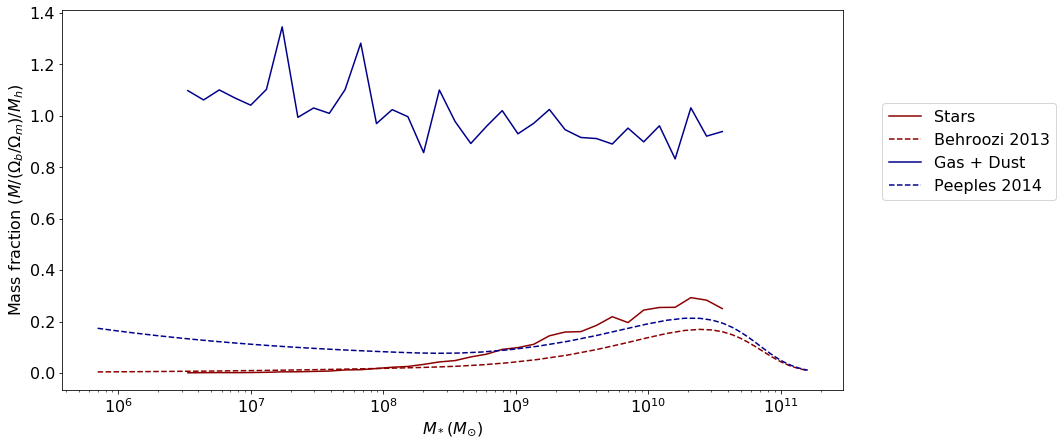

In [37]:
%aimport stellar_mass_fraction_plots
from stellar_mass_fraction_plots import *

baryon_frac(filtered, 2)

Peeples 2014 is an accounting of ISM gas and this selection includes all gas in the CGM, which is why the gas count appears so high. 